# Credit Card Fraud
This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

## Data Science Methodology
    
    1. Business Understanding
    2. Data Preparation
    3. Exploratory Data Analysis (EDA)
    4. Data Modelling

### Business Understanding


**Problem** 
Perusahaan kartu kredit memiliki masalah transaksi *fraud* dengan total kerugian sebesar $5.121.413. Perusahaan tersebut memiliki dataset informasi nasabah. Perusahaan ingin mencegah terjadinya transaksi *fraud* sedini mungkin.

**Business Metric**
Mengurangi jumlah kerugian akibat transaksi *fraud*

**Solution**
Membuat sistem yang dapat memprediksi transaksi yang berpotensi mengakibatkan *fraud*

### Data Preparation 

In [102]:
import pandas as pd

df_train = pd.read_csv('C:/Users/Muhammad Hanif/Desktop/Data Science/Latihan Portofolio/Fraud Analytics/fraudTrain.csv')
df_test  = pd.read_csv('C:/Users/Muhammad Hanif/Desktop/Data Science/Latihan Portofolio/Fraud Analytics/fraudTest.csv')
df = pd.concat([df_train,df_test], ignore_index=True)
print(df.head(5))

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [103]:
df.count()

Unnamed: 0               1852394
trans_date_trans_time    1852394
cc_num                   1852394
merchant                 1852394
category                 1852394
amt                      1852394
first                    1852394
last                     1852394
gender                   1852394
street                   1852394
city                     1852394
state                    1852394
zip                      1852394
lat                      1852394
long                     1852394
city_pop                 1852394
job                      1852394
dob                      1852394
trans_num                1852394
unix_time                1852394
merch_lat                1852394
merch_long               1852394
is_fraud                 1852394
dtype: int64

Kita mempunyai  1852394 data 

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [105]:
df = df.rename(columns = {'amt':'amount'})

In [106]:
# Understand the variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Number of Null','Type of Column'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(),df[var].isnull().sum().sum(),df[var].dtypes]
    
# Join with the variables dataframe
print(variables.set_index('Variable'))

                      Number of unique values Number of Null Type of Column
Variable                                                                   
Unnamed: 0                            1296675              0          int64
trans_date_trans_time                 1819551              0         object
cc_num                                    999              0          int64
merchant                                  693              0         object
category                                   14              0         object
amount                                  60616              0        float64
first                                     355              0         object
last                                      486              0         object
gender                                      2              0         object
street                                    999              0         object
city                                      906              0         object
state       

### Exploratory Data Analysis (EDA) 

kolom berikut ini akan dihapus :

    1. unnamed: 0 menunjukan index baris bawaan dari csv
    2. first dan last menjadi nama nasabah yang dapat diwakilkan melalui trans_num
    3. street,zip,city_pop,city akan diwakilkan melalui state        

In [107]:
df.drop(['Unnamed: 0','first','last','street','zip','trans_num','unix_time','city_pop','city'],axis=1,inplace=True)

In [108]:
import datetime as dt
df['trans_date_trans_time_new']=pd.to_datetime(df['trans_date_trans_time'])
df['trans_date']=df['trans_date_trans_time_new'].dt.year
df['dob']=pd.to_datetime(df['dob']).dt.year
df['age'] = df['trans_date']-df['dob']
df['age'].head()
df.drop(['dob','trans_date','trans_date_trans_time_new','trans_date_trans_time'],axis=1,inplace=True)

In [109]:
df.columns

Index(['cc_num', 'merchant', 'category', 'amount', 'gender', 'state', 'lat',
       'long', 'job', 'merch_lat', 'merch_long', 'is_fraud', 'age'],
      dtype='object')

In [110]:
import numpy as np
df.select_dtypes(include=np.number).columns

Index(['cc_num', 'amount', 'lat', 'long', 'merch_lat', 'merch_long',
       'is_fraud', 'age'],
      dtype='object')

In [111]:
binary = ['gender']
nominal = ['category']
label = ['merchant','job','state']

### Distribusi nilai yang bersifat numerik

AxesSubplot(0.260833,0.125;0.503333x0.755)


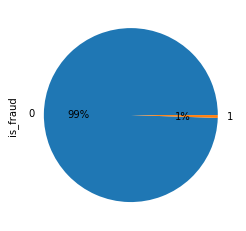

In [112]:
print((df['is_fraud'].value_counts()).plot(kind='pie',autopct='%1.0f%%'))

**business insight**
    
    1. transaksi fraud hanya 1% dibanding transaksi tidak fraud


Dataset tidak balance maka harus dilakukan oversampling

In [113]:
round(df[df['is_fraud']==1][['amount','age']].describe())

,amount,age
count,9651.0,9651.0
mean,531.0,49.0
std,391.0,19.0
min,1.0,14.0
25%,240.0,33.0
50%,390.0,48.0
75%,902.0,61.0
max,1376.0,96.0


**business insight**

    1. Banyaknya transaksi fraud adalah 9651 transaksi
    2. rata-rata transaksi fraud yaitu 531

In [114]:
df[df['is_fraud']==1]['amount'].sum()

5121413.290000001

**busines insight** : total kerugian transaksi fraud yaitu $5.121.413

C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


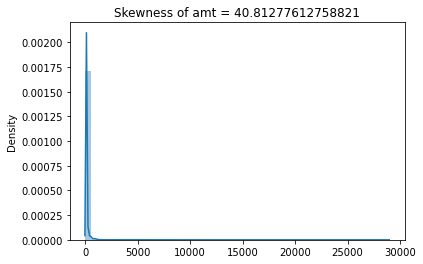

In [115]:
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
skewness = str(skew(df['amount']))
sns.distplot(x=df['amount'])
plt.title("Skewness of amt"+" = "+skewness)
plt.show()

Distribusi nilai amount tidak merata cenderung condong ke nilai mendekati 0

C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount'>

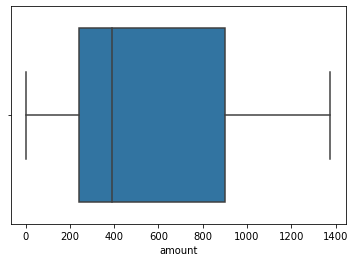

In [116]:
sns.boxplot(df[df['is_fraud']==1]['amount'])

**business insight** transaksi fraud cenderung terjadi dengan besaran transaksi yaitu 0-1400

C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


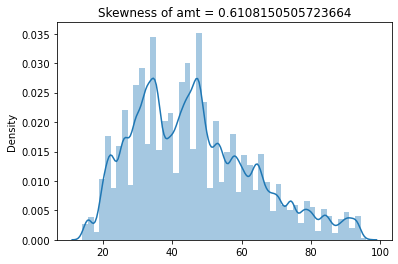

In [117]:
skewness = str(skew(df['age']))
sns.distplot(x=df['age'])
plt.title("Skewness of amt"+" = "+skewness)
plt.show()

Distribusi nilai age merata karena nilai skew dibawah 0,8

### Hubungan antara nominal dan label dengan variabel target

### Jumlah Transaksi Fraud

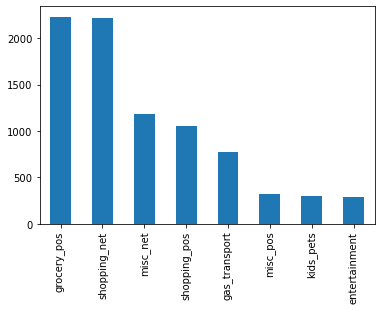

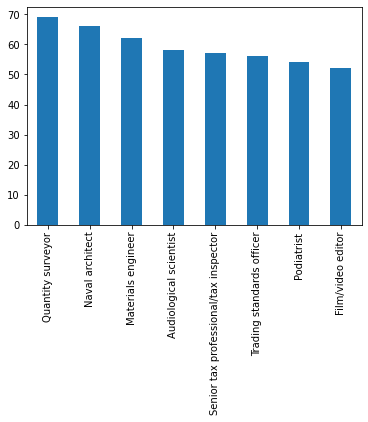

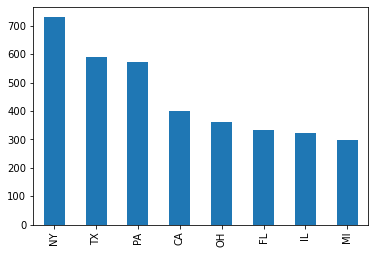

In [118]:
df[df['is_fraud']==1]['category'].value_counts()[:8].plot(kind='bar')
plt.show()
df[df['is_fraud']==1]['job'].value_counts()[:8].plot(kind='bar')
plt.show()
df[df['is_fraud']==1]['state'].value_counts()[:8].plot(kind='bar')
plt.show()

**business insight**

    1. grocery_pos dan shoping_net merupakan kategori yang paling sering mengalami transaksi fraud
    2. New York merupakan state yang paling sering mengalami transaksi fraud

### Jumlah Total Nominal Transaksi Fraud

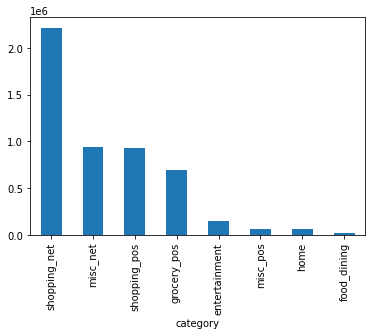

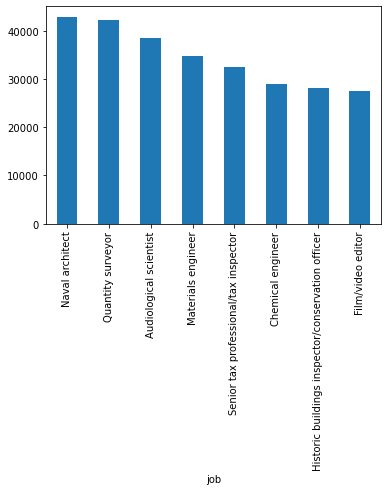

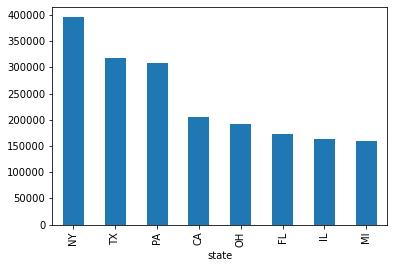

In [129]:
df[df['is_fraud']==1].groupby('category')['amount'].sum().sort_values(ascending=False)[:8].plot(kind='bar')
plt.show()
df[df['is_fraud']==1].groupby('job')['amount'].sum().sort_values(ascending=False)[:8].plot(kind='bar')
plt.show()
df[df['is_fraud']==1].groupby('state')['amount'].sum().sort_values(ascending=False)[:8].plot(kind='bar')
plt.show()

**business insight**

    1. shoping_net merupakan category yang paling dirugikan dalam transaksi fraud
    2. Naval arsitek,quantity surveyor dan material engineer merupakan pekerjaan yang paling dirugikan dalam transaksi fraud
    3. NY,TX dan PA merupakan state yang paling dirugikan dalam transaksi fraud

### Logaritming Scalling
dilakukan untuk meratakan nilai dari satu distribusi. Meningkatkan interval nilai antara variabel dapat meningkatkan performa model.

C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


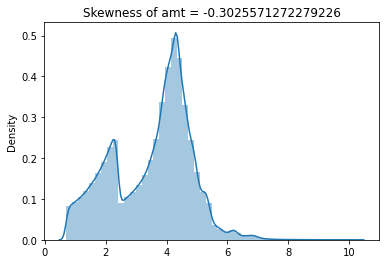

In [130]:
df['amount'] = np.log1p(df['amount'])
skewness = str(skew(df['amount']))
sns.distplot(x=df['amount'])
plt.title("Skewness of amt"+" = "+skewness)
plt.show()

### Resampling
Hal ini dilakukan karena data target tidak balance 

In [17]:
#Data_Preparation
from sklearn.preprocessing import LabelEncoder
y = df['is_fraud']
X = df.drop('is_fraud',axis=1)
#Encoding Nominal
def nominal_encode(df, columns):
    df = df.copy()
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df
X = nominal_encode(X,nominal)
#Encoding Binary
def binary_encode(df, columns, positive_label):
    df = df.copy()
    for column in columns:
        df[column] = df[column].apply(lambda x: 1 if x == positive_label else 0)
    return df
X = binary_encode(X, binary, 'M')
#Encoding Label
label_encoder = LabelEncoder()
#merchant
X['merchant_number'] = label_encoder.fit_transform(X['merchant'])
X['job_number'] = label_encoder.fit_transform(X['job'])
X['state_number'] = label_encoder.fit_transform(X['state'])
y = label_encoder.fit_transform(y)
X.drop(['merchant','job','state'],axis=1,inplace=True)
print(X.columns)

Index(['cc_num', 'amount', 'gender', 'lat', 'long', 'merch_lat', 'merch_long',
       'age', 'entertainment', 'food_dining', 'gas_transport', 'grocery_net',
       'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net',
       'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos', 'travel',
       'merchant_number', 'job_number', 'state_number'],
      dtype='object')


In [18]:
print(X.head(3))
print(y)

             cc_num    amount  gender      lat      long  merch_lat  \
0  2703186189652095  1.786747       0  36.0788  -81.1781  36.011293   
1      630423337322  4.684259       0  48.8878 -118.2105  49.159047   
2    38859492057661  5.398660       1  42.1808 -112.2620  43.150704   

   merch_long  age  entertainment  food_dining  ...  kids_pets  misc_net  \
0  -82.048315   31              0            0  ...          0         1   
1 -118.186462   41              0            0  ...          0         0   
2 -112.154481   57              1            0  ...          0         0   

   misc_pos  personal_care  shopping_net  shopping_pos  travel  \
0         0              0             0             0       0   
1         0              0             0             0       0   
2         0              0             0             0       0   

   merchant_number  job_number  state_number  
0              514         372            27  
1              241         431            47  
2   

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 25 columns):
 #   Column           Dtype  
---  ------           -----  
 0   cc_num           int64  
 1   amount           float64
 2   gender           int64  
 3   lat              float64
 4   long             float64
 5   merch_lat        float64
 6   merch_long       float64
 7   age              int64  
 8   entertainment    uint8  
 9   food_dining      uint8  
 10  gas_transport    uint8  
 11  grocery_net      uint8  
 12  grocery_pos      uint8  
 13  health_fitness   uint8  
 14  home             uint8  
 15  kids_pets        uint8  
 16  misc_net         uint8  
 17  misc_pos         uint8  
 18  personal_care    uint8  
 19  shopping_net     uint8  
 20  shopping_pos     uint8  
 21  travel           uint8  
 22  merchant_number  int32  
 23  job_number       int32  
 24  state_number     int32  
dtypes: float64(5), int32(3), int64(3), uint8(14)
memory usage: 159.0 MB


### SMOTE (Synthetic Minority Oversampling Technique)
teknik resampling dengan mengambil nilai mayoritas kemudian diduplikasi dengan nilai yang mendekati

In [20]:
#Split Train and Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=21)
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_new, y_train_new = smote.fit_resample(X_train, y_train)
X_test_new, y_test_new = smote.fit_resample(X_test, y_test)

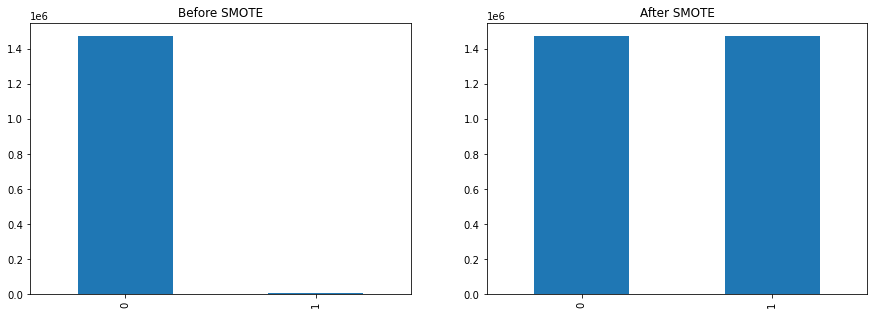

In [21]:
# to demonstrate the effect of SMOTE over imbalanced datasets
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.bar(ax=ax2)

plt.show()

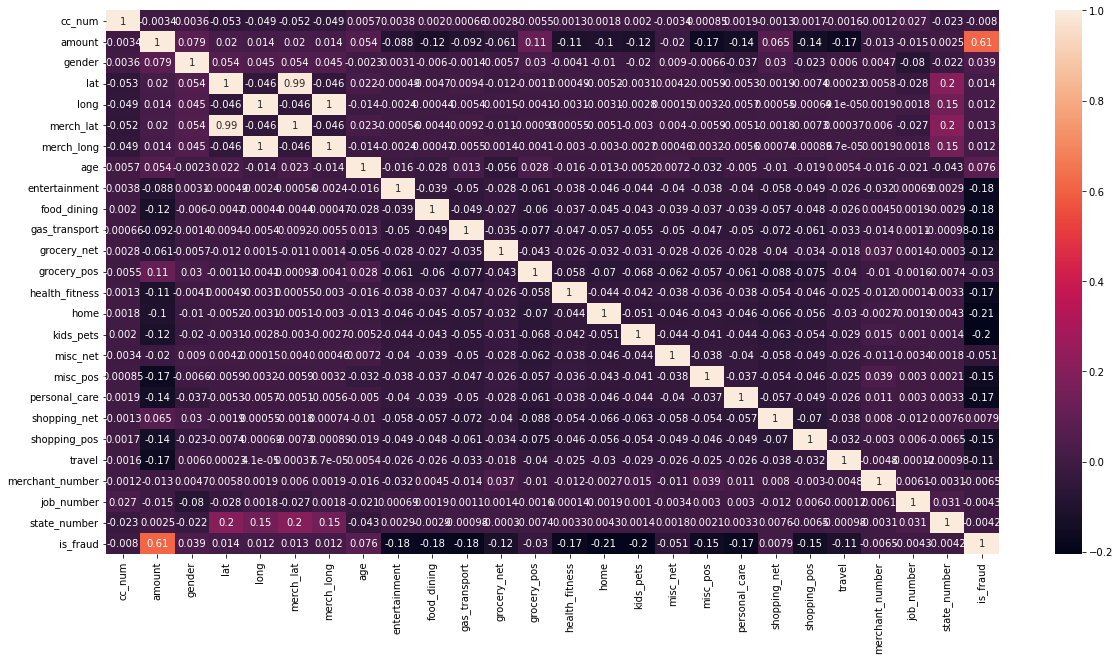

<AxesSubplot:xlabel='gender'>

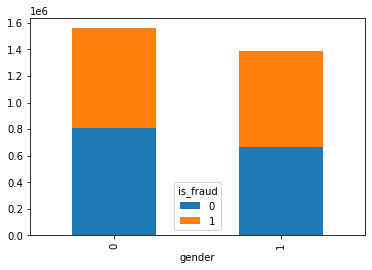

In [22]:
#Correlation any variabels
df_convert_new = X_train_new.copy()
df_convert_new['is_fraud'] = y_train_new.tolist()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_convert_new.corr(), annot=True)
plt.show()
(df_convert_new.groupby(['gender','is_fraud'])['is_fraud'].size()).unstack().plot(kind='bar', stacked=True)

Korelasi yang kuat ada pada : amount,entertaiment,food_dining,gas_transport,grocery_net,gas_transport,health_fitnes,home,kid_pets,misc_pos,travel,shopping_pos

## Data Modelling 

### Logistic Regression
Melakukan korelasi antara fitur dan target variabel

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
#StandardScaller
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train_new)
X_test_new = scaler.transform(X_test_new)
model = LogisticRegression()
model.fit(X_train_new,y_train_new)
y_pred = model.predict(X_test_new)

### Scoring Model
Confusion Matriks:

TP : Prediksi(benar) Test(benar)

TN : Prediksi(salah) Test (salah)

FP : Prediksi (benar) Test (salah)

FN : Prediksi (salah) Test (benar)


Accuracy : Jumlah proporsi prediksi yang tepat (TP+TN) dengan keseluruhan 

Prediksi (TP+FP+TN+FP)

Presisi : Jumlah proporsi prediksi yang benar (TP) dengan keseluruhan hasil yang benar (TP+FN)

Recall  : Jumlah proporsi hasil yang benar (TP) dengan keseluruhan prediksi yang positif (TP+FP)

Pada model ini karena digunakan untuk mendeteksi fraud yang terjadi maka akan menggunakan scoring utama yaitu akurasi. Jika model dapat memprediksi **secara tepat** maka dapat **mencegah terjadinya fraud**. Jika model memprediksi **secara keliru** dapat **merugikan pelanggan**. 


In [1]:
from sklearn.metrics import confusion_matrix
print ('confusion matrix :',confusion_matrix(y_test_new,y_pred))
ax = sns.heatmap(confusion_matrix(y_test_new,y_pred), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
#ROC Curve
from sklearn import metrics
#define metrics
y_pred_proba = model.predict_proba(X_test_new)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_new,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#dicek overfitting atau underfitting

NameError: name 'y_test_new' is not defined

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print('Recall: %.3f' % recall_score(y_test_new, y_pred))
print ('accuracy :',accuracy_score(y_test_new,y_pred))
print ('precision :',precision_score(y_test_new,y_pred))

Recall: 0.951
accuracy : 0.9668597395550732
precision : 0.9826418396452642


### Overfitting or Underfitting
Overfitting adalah ketika model terlalu mengikuti data training
Underfitting adalah ketika model tidak baik dalam mempelajari data training

In [26]:
y_pred_test = model.predict(X_test_new)
y_pred_train = model.predict(X_train_new)
print ('accuracy test :',accuracy_score(y_test_new,y_pred_test))
print ('accuracy train :',accuracy_score(y_train_new,y_pred_train))

accuracy test : 0.9668597395550732
accuracy train : 0.9656020481052381


Model tidak overfitting maupun underfitting

### Random Forest
Ensamble learning dengan Decision Tree Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='entropy',n_estimators=50,n_jobs=-1)
model.fit(X_train_new,y_train_new)
y_pred = model.predict(X_test_new)

In [ ]:
print ('confusion matrix :',confusion_matrix(y_test_new,y_pred))
ax = sns.heatmap(confusion_matrix(y_test_new,y_pred), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
#ROC Curve
from sklearn import metrics
#define metrics
y_pred_proba = model.predict_proba(X_test_new)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_new,  y_pred_proba)
#dicek overfitting atau underfitting
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('Recall: %.3f' % recall_score(y_test_new, y_pred))
print ('accuracy :',accuracy_score(y_test_new,y_pred))
print ('precision :',precision_score(y_test_new,y_pred))

### Feature Importance
Fitur yang paling berpengaruh pada model dengan random forest classifier

In [ ]:
feature=model.feature_importances_
plt.bar(range(X_train.shape[1]),feature,color='blue',align='center')
plt.show()
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

### Overfitting or Underfitting
Overfitting adalah ketika model terlalu mengikuti data training Underfitting adalah ketika model tidak baik dalam mempelajari data training

In [ ]:
y_pred_test = model.predict(X_test_new)
y_pred_train = model.predict(X_train_new)
print ('accuracy test :',accuracy_score(y_test_new,y_pred_test))
print ('accuracy train :',accuracy_score(y_train_new,y_pred_train))

In [ ]:
print (model.get_params())

### Hypertunning Paramater
Mengoptimalkan parameter yang digunakan pada model

In [ ]:
#HyperTuning Model
#from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
#max_features = ['sqrt', 'log2', None]
# Minimum number of samples required to split a node
#min_samples_split = [1,2,3,4,5]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1,2,3,4,5]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
#Criterion
#criterion = ['entropy']
# Create the random grid
#random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap,
               #'criterion': criterion}
# search across 100 different combinations, and use all available cores
#model_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#model_random.fit(X_train_new,y_train_new)
#model_random.best_params_

### SV (Support Vector)
Melakukan permodelan dengan prinsip support vector

In [ ]:
#LinearSVC
from sklearn.svm import LinearSVC
model_SVC = LinearSVC(random_state=0)
model_SVC.fit(X_train_new,y_train_new)
y_pred = model_SVC.predict(X_test_new)